In [2]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from nearest_neighbours import KNClassifier, KNRegressor, RNClassifier 
from decision_tree import DecisionTreeService
from sklearn.model_selection import train_test_split
import pickle
from diagonal_paralelo import create_points_diagonal, create_points_paralelo

# Size of plots
plt.rcParams["figure.figsize"] = (13,9)

In [3]:
def get_best_KNC(k_vals: int, w: str | None, df_data: DataFrame, df_test: DataFrame) -> dict[str, KNClassifier]:
    n_cols = len(df_data.columns)
    _x_train, _x_val, _y_train, _y_val = train_test_split(df_data.loc[:, range(n_cols-1)],
                                                          df_data.loc[:, 'CLASS'],
                                                          random_state=0,
                                                          test_size=0.2)

    clfs: dict[str, KNClassifier] = {'best': None}

    for k in k_vals:
        clf = KNClassifier(k=k, weights=w)
        clf.train(x_train=_x_train, y_train=_y_train, x_val=_x_val, y_val=_y_val)
        clf.predict(df_test.copy())
        clfs[f'{k}'] = clf

        if not clfs['best'] or clf.val_error < clfs['best'].val_error:
            clfs['best'] = clf
    
    return clfs

def get_best_KNR(k_vals: int, w: str | None, df_data: DataFrame, df_test: DataFrame) -> dict[str, KNRegressor]:
    n_cols = len(df_data.columns)
    _x_train, _x_val, _y_train, _y_val = train_test_split(df_data.loc[:, range(n_cols-1)],
                                                          df_data.loc[:, 'CLASS'],
                                                          random_state=0,
                                                          test_size=0.2)

    clfs: dict[str, KNRegressor] = {'best': None}

    for k in k_vals:
        clf = KNRegressor(k=k, weights=w)
        clf.train(x_train=_x_train, y_train=_y_train, x_val=_x_val, y_val=_y_val)
        clf.predict(df_test.copy())
        clfs[f'{k}'] = clf

        if not clfs['best'] or clf.val_error < clfs['best'].val_error:
            clfs['best'] = clf
    
    return clfs

def get_best_RNC(r_vals: int, w: str | None, df_data: DataFrame, df_test: DataFrame) -> dict[str, RNClassifier]:
    n_cols = len(df_data.columns)
    _x_train, _x_val, _y_train, _y_val = train_test_split(df_data.loc[:, range(n_cols-1)],
                                                          df_data.loc[:, 'CLASS'],
                                                          random_state=0,
                                                          test_size=0.2)

    clfs: dict[str, RNClassifier] = {'best': None}

    for r in r_vals:
        clf = RNClassifier(r=r, weights=w)
        clf.train(x_train=_x_train, y_train=_y_train, x_val=_x_val, y_val=_y_val)
        clf.predict(df_test.copy())
        clfs[f'{r}'] = clf

        if not clfs['best'] or clf.val_error < clfs['best'].val_error:
            clfs['best'] = clf
    
    return clfs

In [4]:
def plot_clfs_errors(ns: list[int], clfs: KNClassifier | KNRegressor, title: str = ''):
    clf_train_error = [clfs[f'{n}'].train_error for n in ns]
    clf_val_error = [clfs[f'{n}'].val_error for n in ns]
    clf_test_error = [clfs[f'{n}'].test_error for n in ns]


    plt.plot(ns, clf_train_error, label="train", linestyle="--")
    plt.plot(ns, clf_val_error, label="validacion", linestyle="-.")
    plt.plot(ns, clf_test_error, label="test", linestyle="-")
    plt.legend()
    plt.title(title)
    plt.show()

# Ejercicio 1

El mejor modelos es con k=3


<AxesSubplot:title={'center':'DecisionTreeService'}, xlabel='0', ylabel='1'>

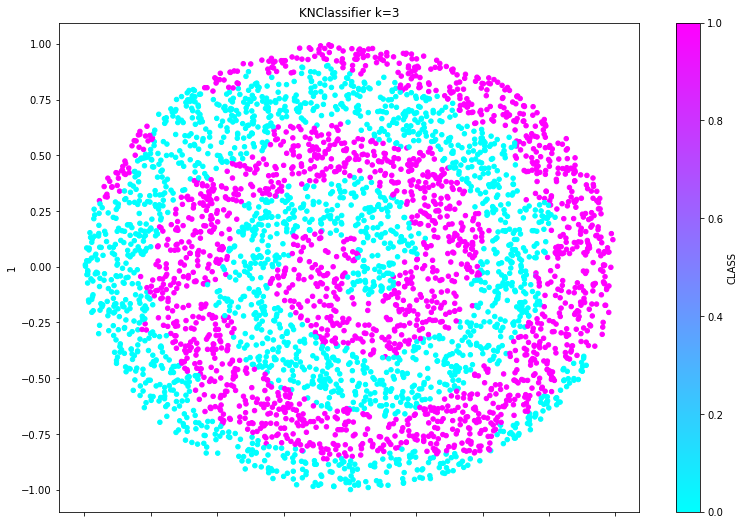

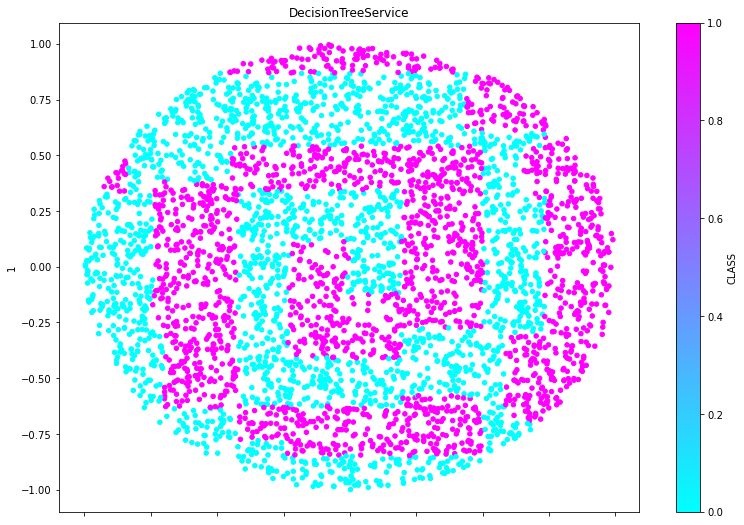

In [15]:
ej1_df_data = read_csv('espirales/c_0.data', names=[0, 1, 'CLASS'])
ej1_df_test = read_csv('espirales/c_0.test', names=[0, 1, 'CLASS'])

_x_train, _, _y_train, _ = train_test_split(ej1_df_data.loc[:, [0,1]],
                                            ej1_df_data.loc[:, 'CLASS'],
                                            random_state=0,
                                            test_size=0.2)

k_vals = range(1,30)
ej1_clfs = get_best_KNC(k_vals=k_vals, w=None, df_data=ej1_df_data, df_test=ej1_df_test)

print(f"El mejor modelos es con k={ej1_clfs['best'].k}")
pred = ej1_clfs['best'].predict(ej1_df_test.copy())
pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f"KNClassifier k={ej1_clfs['best'].k}")

_tree = DecisionTreeService()
_tree.train(_x_train, _y_train)
pred = _tree.predict(ej1_df_test.copy())
pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f'DecisionTreeService')

<AxesSubplot:title={'center':'KNClassifier k=29'}, xlabel='0', ylabel='1'>

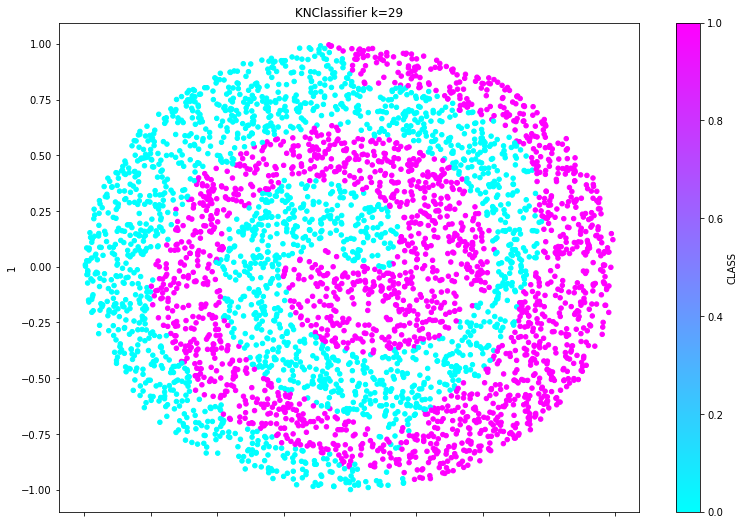

In [16]:
pred = ej1_clfs['29'].predict(ej1_df_test.copy())
pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f"KNClassifier k={ej1_clfs['29'].k}")

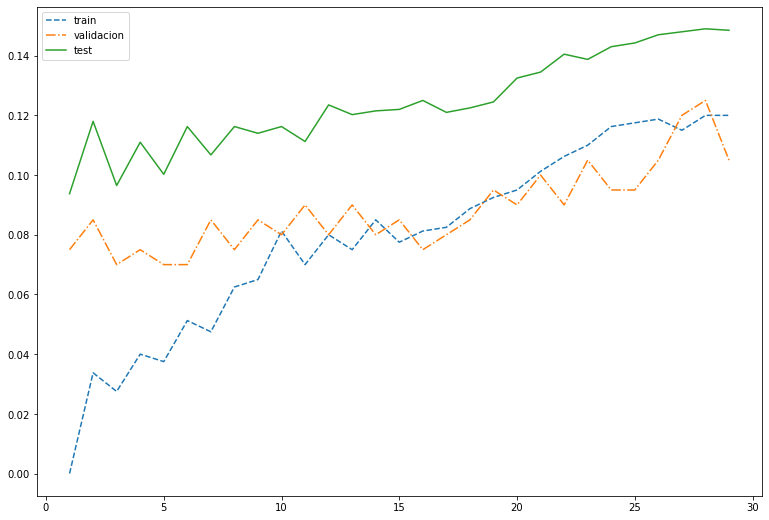

In [28]:
plot_clfs_errors(k_vals, ej1_clfs)

<AxesSubplot:title={'center':'DecisionTreeService'}, xlabel='0', ylabel='1'>

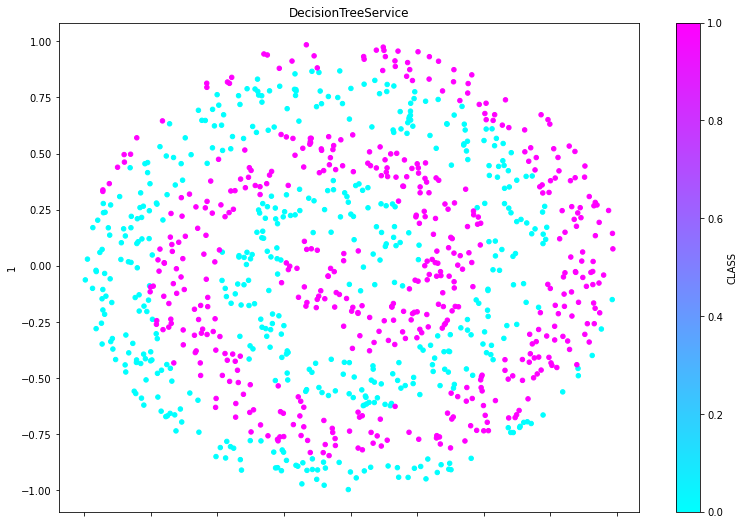

In [33]:
ej1_df_data.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f'DecisionTreeService')

Podemos ver que el modelo k-vecinos es ampliamente superior al modelo de arboles. En la grafica de error podemos notar varias cosas. La primera que podemos destacar es que el error de testeo aumenta a medida que aumenta la cantidad de vecinos, esto se debe a que aumentamos la cantidad de puntos que "votan" y de esta manera se generaliza mas el problema. Esto lo podemos ver mejor si ploteamos el resultado de k=29, donde las zonas donde el espiral termina y es mas fino, como tomamos muchos vecinos estas zonas son mal clasificadas ya que no contienen muchos puntos de su clase.

Tambien se puede notar es que con k=1 el error de train es siempre 0. Esto se debe porque al tratar de predecir un punto por el cual el modelo entreno, toma al punto de entrenamiento mas cercano (el mismo punto) y lo clasifica bien, teniendo 0 de error.

Por ultimo podemos ver como hay un poco de sobreajuste que disminuye a medida que aumenta el k, igual esto no nos importa ya que el modelo, con un k bajo (1 a 7 aprox) el error es cercano al error de bayes por lo que termina siendo un buen modelo.

Por ultimo, me ayudo un poco plotear el dataset para poder ver como se comporta el modelo. Por ejemplo en el sector (-.5, .75) podemos ver que nuestro modelo nos lo clasifica como clase 0 pero en realidad es 1, esto se debe a que no tenemos puntos de clase 1 en esa zona y si tomamos los 3 puntos mas cercanos, la mayoria son de clase 0 por lo que clasificamos esa zona como clase 0

El mejor modelos es con k=1


<AxesSubplot:title={'center':'DecisionTreeService'}, xlabel='0', ylabel='1'>

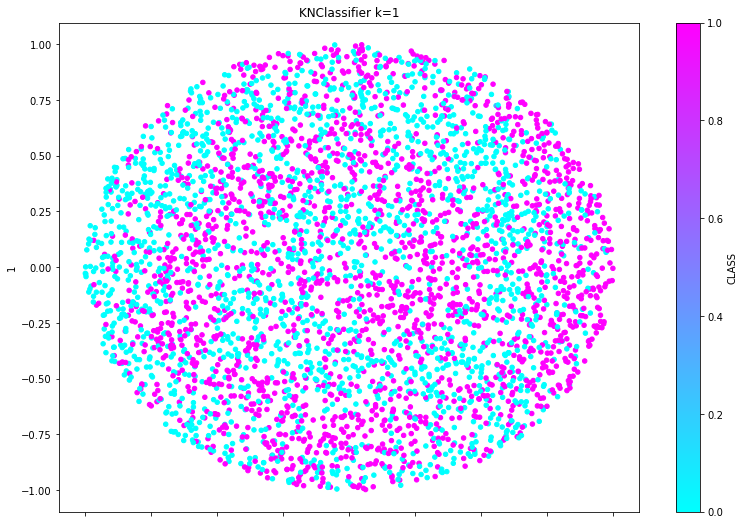

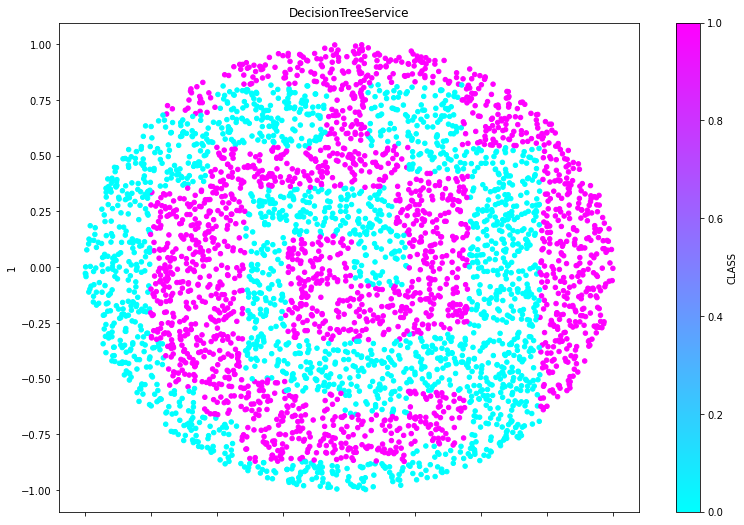

In [6]:
ej1_df_data = read_csv('espirales/c_2.data', names=[0, 1, 2, 3, 'CLASS'])
ej1_df_test = read_csv('espirales/c_2.test', names=[0, 1, 2, 3, 'CLASS'])

_x_train, _, _y_train, _ = train_test_split(ej1_df_data.loc[:, [0,1,2,3]],
                                            ej1_df_data.loc[:, 'CLASS'],
                                            random_state=0,
                                            test_size=0.2)

k_vals = range(1,30)
ej1_wn_clfs = get_best_KNC(k_vals=k_vals, w=None, df_data=ej1_df_data, df_test=ej1_df_test)

print(f"El mejor modelos es con k={ej1_wn_clfs['best'].k}")
pred = ej1_wn_clfs['best'].predict(ej1_df_test.copy())
pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f"KNClassifier k={ej1_wn_clfs['best'].k}")

_tree = DecisionTreeService()
_tree.train(_x_train, _y_train)
pred = _tree.predict(ej1_df_test.copy())
pred.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f'DecisionTreeService')

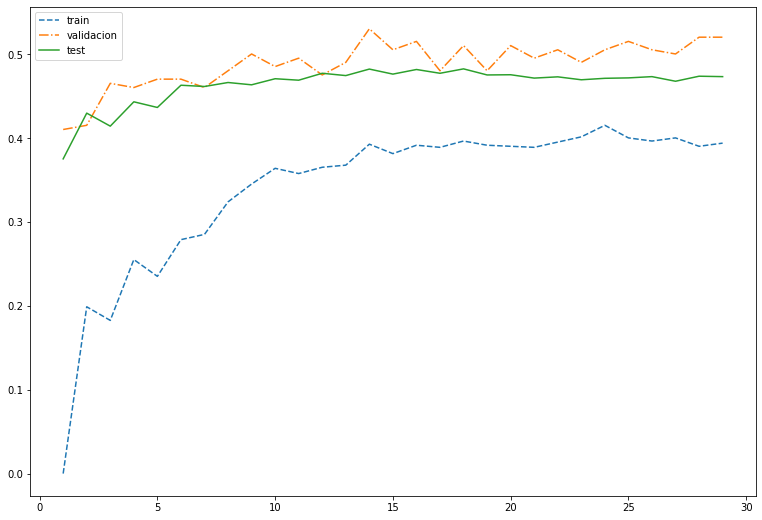

In [7]:
plot_clfs_errors(k_vals, ej1_wn_clfs)

Bueno en este problema podemos notar como el modelo k-vecinos es bastante susceptible al ruido, en especial cuando le agregamos "dimensiones" las cuales no tienen importancia al momento de clasificar los puntos. A diferencia de esto, ya sabemos que los arboles no son susceptibles al ruido y de esta manera logramos una buena clasificacion.

Tambien podemos ver que no cambia nada el aumento o disminucion de vecinos para tener en cuenta al momento de clasificar.

# Ejercicio 2

In [8]:
# Cargamos los errores de los TP viejos
tree_diag_train_error: list[float]
tree_diag_test_error: list[float]
tree_paral_train_error: list[float]
tree_paral_test_error: list[float]

with open(f'tree-errors-dimensionalidad/diag.pkl', 'rb') as file:
    _errors = pickle.load(file)
    tree_diag_train_error = _errors['train']
    tree_diag_test_error = _errors['test']
    
with open(f'tree-errors-dimensionalidad/paral.pkl', 'rb') as file:
    _errors = pickle.load(file)
    tree_paral_train_error = _errors['train']
    tree_paral_test_error = _errors['test']

redes_diag_train_error: list[float]
redes_diag_test_error: list[float]
redes_paral_train_error: list[float]
redes_paral_test_error: list[float]

with open(f'red-errors-dimensionalidad/diag.pkl', 'rb') as file:
    _errors = pickle.load(file)
    redes_diag_train_error = _errors['train']
    redes_diag_test_error = _errors['test']
    
with open(f'red-errors-dimensionalidad/paral.pkl', 'rb') as file:
    _errors = pickle.load(file)
    redes_paral_train_error = _errors['train']
    redes_paral_test_error = _errors['test']

bayes_diag_train_error: list[float]
bayes_diag_test_error: list[float]
bayes_paral_train_error: list[float]
bayes_paral_test_error: list[float]

with open(f'bayes-errors-dimensionalidad/diag.pkl', 'rb') as file:
    _errors = pickle.load(file)
    bayes_diag_train_error = _errors['train']
    bayes_diag_test_error = _errors['test']
    
with open(f'bayes-errors-dimensionalidad/paral.pkl', 'rb') as file:
    _errors = pickle.load(file)
    bayes_paral_train_error = _errors['train']
    bayes_paral_test_error = _errors['test']

In [9]:
d_vals = [2, 4, 8, 16, 32]

ej2_diag_train_errors = []
ej2_diag_test_errors = []
ej2_paral_train_errors = []
ej2_paral_test_errors = []

for d in d_vals:
    df_test = create_points_diagonal(d, 10000, .78)
    tmp: KNClassifier | None = None
    _train_errors = 0
    _test_errors = 0

    for _ in range(20):
        df_data = create_points_diagonal(d, 250, .78)
        clf = KNClassifier(k=1)
        clf.train(x_train=df_data.loc[:, range(d)], y_train=df_data.loc[:, 'CLASS'])
        clf.predict(df_test.copy())
        _train_errors += clf.train_error
        _test_errors += clf.test_error

        if not tmp or clf.test_error < tmp.test_error:
            tmp = clf
    
    ej2_diag_train_errors.append(_train_errors/20)
    ej2_diag_test_errors.append(_test_errors/20)

for d in d_vals:
    df_test = create_points_paralelo(d, 10000, .78)
    tmp: KNClassifier | None = None
    _train_errors = 0
    _test_errors = 0

    for _ in range(20):
        df_data = create_points_paralelo(d, 250, .78)
        clf = KNClassifier(k=1)
        clf.train(x_train=df_data.loc[:, range(d)], y_train=df_data.loc[:, 'CLASS'])
        clf.predict(df_test.copy())
        _train_errors += clf.train_error
        _test_errors += clf.test_error

        if not tmp or clf.test_error < tmp.test_error:
            tmp = clf
    
    ej2_paral_train_errors.append(_train_errors/20)
    ej2_paral_test_errors.append(_test_errors/20)

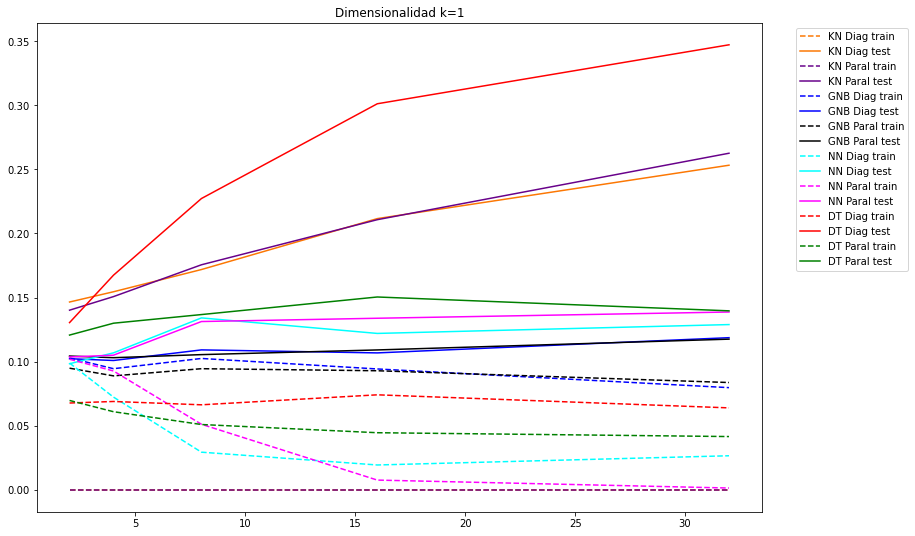

In [10]:
# Ploteamos los K Neighbours
plt.plot(d_vals, ej2_diag_train_errors, color='#fc7703', label="KN Diag train", linestyle="--")
plt.plot(d_vals, ej2_diag_test_errors, color='#fc7703', label="KN Diag test", linestyle="-")
plt.plot(d_vals, ej2_paral_train_errors, color='#68018a', label="KN Paral train", linestyle="--")
plt.plot(d_vals, ej2_paral_test_errors, color='#68018a', label="KN Paral test", linestyle="-")

# Ploteamos las Gaussian Naive Bayes
plt.plot(d_vals, bayes_diag_train_error, 'blue', label="GNB Diag train", linestyle="--")
plt.plot(d_vals, bayes_diag_test_error, 'blue', label="GNB Diag test", linestyle="-")
plt.plot(d_vals, bayes_paral_train_error, 'black', label="GNB Paral train", linestyle="--")
plt.plot(d_vals, bayes_paral_test_error, 'black', label="GNB Paral test", linestyle="-")

# Ploteamos las Red Classifier
plt.plot(d_vals, redes_diag_train_error, 'cyan', label="NN Diag train", linestyle="--")
plt.plot(d_vals, redes_diag_test_error, 'cyan', label="NN Diag test", linestyle="-")
plt.plot(d_vals, redes_paral_train_error, 'magenta', label="NN Paral train", linestyle="--")
plt.plot(d_vals, redes_paral_test_error, 'magenta', label="NN Paral test", linestyle="-")

# Ploteamos los Decision Tree Classifier
plt.plot(d_vals, tree_diag_train_error, 'red', label="DT Diag train", linestyle="--")
plt.plot(d_vals, tree_diag_test_error, 'red', label="DT Diag test", linestyle="-")
plt.plot(d_vals, tree_paral_train_error, 'green', label="DT Paral train", linestyle="--")
plt.plot(d_vals, tree_paral_test_error, 'green', label="DT Paral test", linestyle="-")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Dimensionalidad k=1")
plt.show()

Sabemos que este modelo sufre bastante el problema de dimensionalidad, en especial si trabajamos con un k=1. Como mencionamos en los trabajos anteriores, a medida que aumentamos la dimension y mantenemos la cantidad de puntos en el trainset, se generan vacios en los datos y esto lleva a la mala clasificacion. Al tener bastante espacio entre los puntos de los que entreno, el modelo realiza mal las separaciones (le da mas espacio a las clases cuando en realidad no "le pertenece")

Me gustaria poder discutir esto en persona porque se me complica expresar mi idea de forma escrita.
Por las dudas adjunto un link de una foto que me ayudo a llegar a esta conclusion

https://i.stack.imgur.com/PiJ5G.png

Otra cosa para notar es que el error de test es similar para ambos problemas (diagonal y paralelo) por lo que k-vecinos puede ser utilizado para ambos problemas.

In [11]:
d_vals = [2, 4, 8, 16, 32]

ej2_diag_train_errors = []
ej2_diag_test_errors = []
ej2_paral_train_errors = []
ej2_paral_test_errors = []

for d in d_vals:
    df_test = create_points_diagonal(d, 10000, .78)
    tmp: KNClassifier | None = None
    _train_errors = 0
    _test_errors = 0

    for _ in range(20):
        df_data = create_points_diagonal(d, 250, .78)
        clf = get_best_KNC(k_vals=range(1,20), w=None, df_data=df_data, df_test=df_test)['best']
        _train_errors += clf.train_error
        _test_errors += clf.test_error

        if not tmp or clf.test_error < tmp.test_error:
            tmp = clf
    
    ej2_diag_train_errors.append(_train_errors/20)
    ej2_diag_test_errors.append(_test_errors/20)

for d in d_vals:
    df_test = create_points_paralelo(d, 10000, .78)
    tmp: KNClassifier | None = None
    _train_errors = 0
    _test_errors = 0

    for _ in range(20):
        df_data = create_points_paralelo(d, 250, .78)
        clf = get_best_KNC(k_vals=range(1,20), w=None, df_data=df_data, df_test=df_test)['best']
        _train_errors += clf.train_error
        _test_errors += clf.test_error

        if not tmp or clf.test_error < tmp.test_error:
            tmp = clf
    
    ej2_paral_train_errors.append(_train_errors/20)
    ej2_paral_test_errors.append(_test_errors/20)

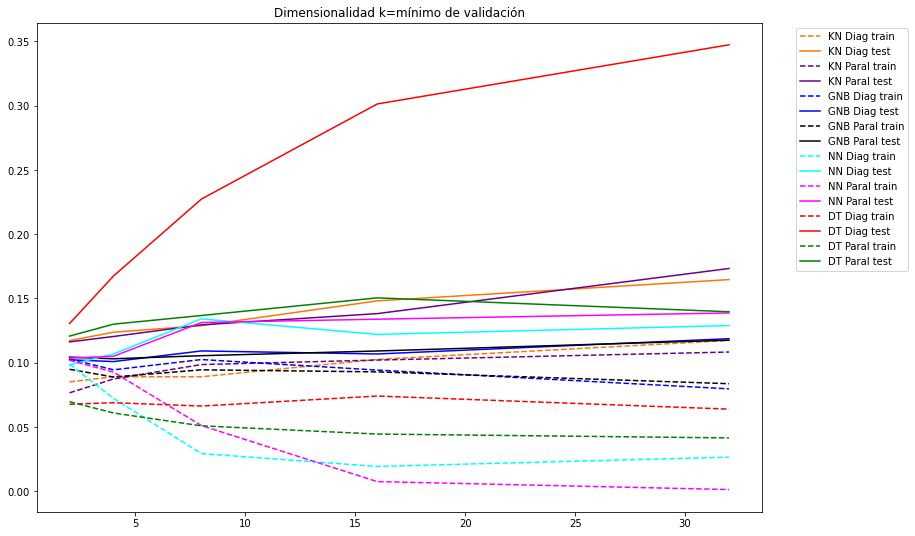

In [12]:
# Ploteamos los K Neighbours
plt.plot(d_vals, ej2_diag_train_errors, color='#fc7703', label="KN Diag train", linestyle="--")
plt.plot(d_vals, ej2_diag_test_errors, color='#fc7703', label="KN Diag test", linestyle="-")
plt.plot(d_vals, ej2_paral_train_errors, color='#68018a', label="KN Paral train", linestyle="--")
plt.plot(d_vals, ej2_paral_test_errors, color='#68018a', label="KN Paral test", linestyle="-")

# Ploteamos las Gaussian Naive Bayes
plt.plot(d_vals, bayes_diag_train_error, 'blue', label="GNB Diag train", linestyle="--")
plt.plot(d_vals, bayes_diag_test_error, 'blue', label="GNB Diag test", linestyle="-")
plt.plot(d_vals, bayes_paral_train_error, 'black', label="GNB Paral train", linestyle="--")
plt.plot(d_vals, bayes_paral_test_error, 'black', label="GNB Paral test", linestyle="-")

# Ploteamos las Red Classifier
plt.plot(d_vals, redes_diag_train_error, 'cyan', label="NN Diag train", linestyle="--")
plt.plot(d_vals, redes_diag_test_error, 'cyan', label="NN Diag test", linestyle="-")
plt.plot(d_vals, redes_paral_train_error, 'magenta', label="NN Paral train", linestyle="--")
plt.plot(d_vals, redes_paral_test_error, 'magenta', label="NN Paral test", linestyle="-")

# Ploteamos los Decision Tree Classifier
plt.plot(d_vals, tree_diag_train_error, 'red', label="DT Diag train", linestyle="--")
plt.plot(d_vals, tree_diag_test_error, 'red', label="DT Diag test", linestyle="-")
plt.plot(d_vals, tree_paral_train_error, 'green', label="DT Paral train", linestyle="--")
plt.plot(d_vals, tree_paral_test_error, 'green', label="DT Paral test", linestyle="-")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Dimensionalidad k=mínimo de validación")
plt.show()

Podemos ver una mejora muy grande en relacion al grafico anterior. El error de test aumenta muy poco a medida que aumenta la dimension y podemos ver que son similares para ambos problemas.

Ahora como estamos buscando en cada dimension el k optimo, los espacios vacios que tenemos al trabajar en una dimension alta, pasan a ser distribuidos de mejor forma y el modelo no realiza una mala separacion de los puntos.

La linea de pensamiento es similar a la anterior, usando la imagen del link anterior.

# Ejercicio 3

In [24]:
d_vals = [2, 4, 8, 16, 32]

ej3_k_opt_diag_train_errors = []
ej3_k_opt_diag_test_errors = []
ej3_k_opt_paral_train_errors = []
ej3_k_opt_paral_test_errors = []

for d in d_vals:
    _train = 0
    _test = 0
    for _ in range(20):
        df_test = create_points_diagonal(d, 10000, .78)
        df_data = create_points_diagonal(d, 250, .78)
        clf = get_best_KNC(k_vals=range(1,20), w='distance', df_data=df_data, df_test=df_test)['best']
        _train += clf.train_error
        _test += clf.test_error
    
    ej3_k_opt_diag_train_errors.append(_train/20)
    ej3_k_opt_diag_test_errors.append(_test/20)

for d in d_vals:
    _train = 0
    _test = 0
    for _ in range(20):
        df_test = create_points_paralelo(d, 10000, .78)
        df_data = create_points_paralelo(d, 250, .78)
        clf = get_best_KNC(k_vals=range(1,20), w='distance', df_data=df_data, df_test=df_test)['best']
        _train += clf.train_error
        _test += clf.test_error
    
    ej3_k_opt_paral_train_errors.append(_train/20)
    ej3_k_opt_paral_test_errors.append(_test/20)

ej3_k_50_diag_train_errors = []
ej3_k_50_diag_test_errors = []
ej3_k_50_paral_train_errors = []
ej3_k_50_paral_test_errors = []

for d in d_vals:
    _train = 0
    _test = 0
    for _ in range(20):
        df_test = create_points_diagonal(d, 10000, .78)
        df_data = create_points_diagonal(d, 250, .78)
        clf = KNClassifier(k=50, weights='distance')
        clf.train(x_train=df_data.loc[:, range(d)], y_train=df_data.loc[:, 'CLASS'])
        clf.predict(df_test.copy())
        _train += clf.train_error
        _test += clf.test_error
    
    ej3_k_50_diag_train_errors.append(_train/20)
    ej3_k_50_diag_test_errors.append(_test/20)

for d in d_vals:
    _train = 0
    _test = 0
    for _ in range(20):
        df_test = create_points_paralelo(d, 10000, .78)
        df_data = create_points_paralelo(d, 250, .78)
        clf = KNClassifier(k=50, weights='distance')
        clf.train(x_train=df_data.loc[:, range(d)], y_train=df_data.loc[:, 'CLASS'])
        clf.predict(df_test.copy())
        _train += clf.train_error
        _test += clf.test_error
    
    ej3_k_50_paral_train_errors.append(_train/20)
    ej3_k_50_paral_test_errors.append(_test/20)

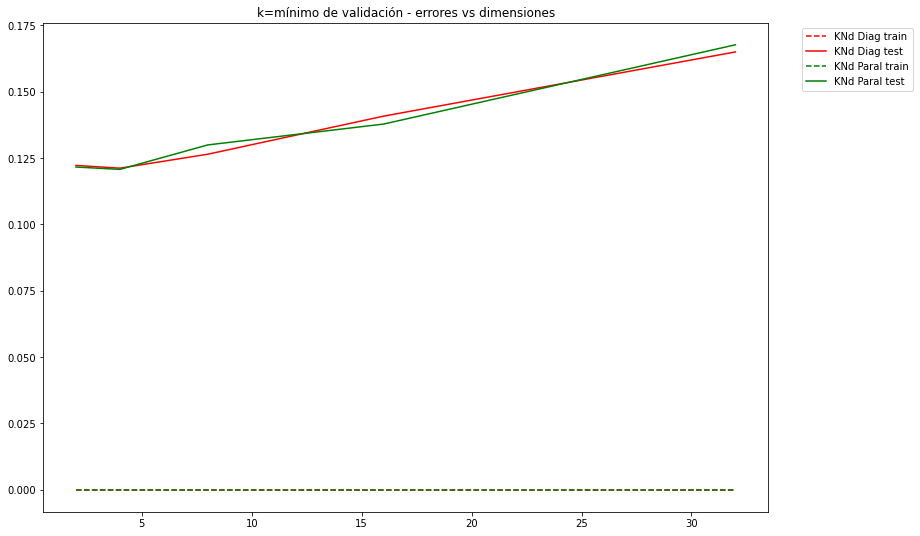

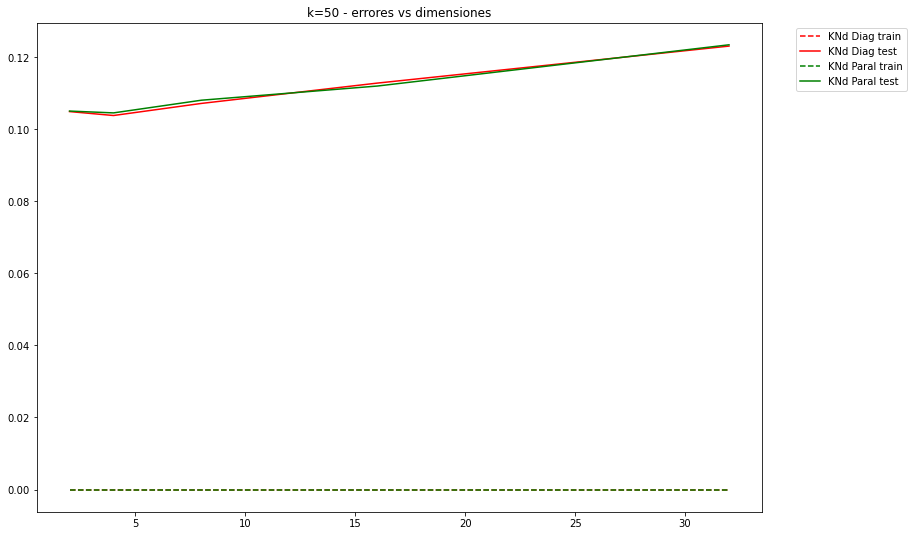

In [25]:
plt.plot(d_vals, ej3_k_opt_diag_train_errors, 'red', label="KNd Diag train", linestyle="--")
plt.plot(d_vals, ej3_k_opt_diag_test_errors, 'red', label="KNd Diag test", linestyle="-")
plt.plot(d_vals, ej3_k_opt_paral_train_errors, 'green', label="KNd Paral train", linestyle="--")
plt.plot(d_vals, ej3_k_opt_paral_test_errors, 'green', label="KNd Paral test", linestyle="-")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("k=mínimo de validación - errores vs dimensiones")
plt.show()

plt.plot(d_vals, ej3_k_50_diag_train_errors, 'red', label="KNd Diag train", linestyle="--")
plt.plot(d_vals, ej3_k_50_diag_test_errors, 'red', label="KNd Diag test", linestyle="-")
plt.plot(d_vals, ej3_k_50_paral_train_errors, 'green', label="KNd Paral train", linestyle="--")
plt.plot(d_vals, ej3_k_50_paral_test_errors, 'green', label="KNd Paral test", linestyle="-")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("k=50 - errores vs dimensiones")
plt.show()

De las dos graficas podemos ver que son bastantes similares y se comportan de manera similar. Se puede ver que con los valores que le pase al programa [1, 19] llegamos a un error mayor al error que tenemos con k=50.

Se puede notar que para ambos problemas, el modelo se comporta de igual manera. Tambien podemos ver que si estamos trabajando en una dimension grande (32), lo mejor que podemos usar es un k grande.

Por ultimo, parece mejorar el hecho de usar como peso la distancia inversa en este problema. Estamos teniendo resultados menores a lo que teniamos cuando el peso de los vecinos era uniforme. 

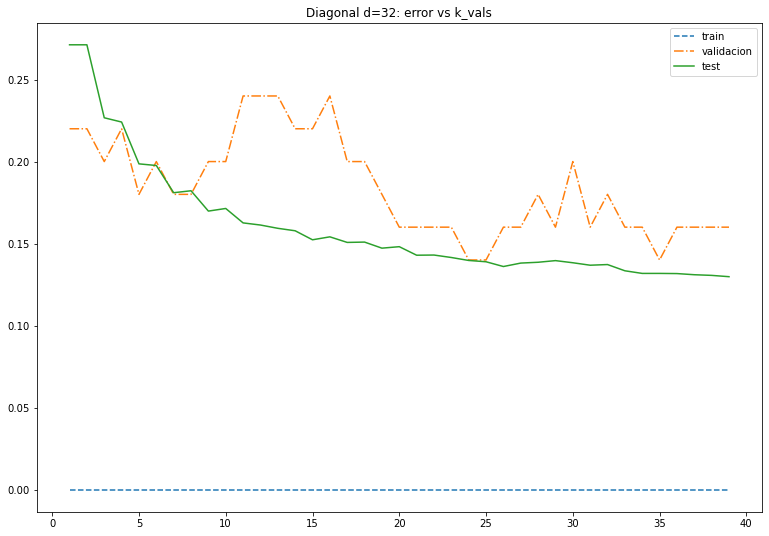

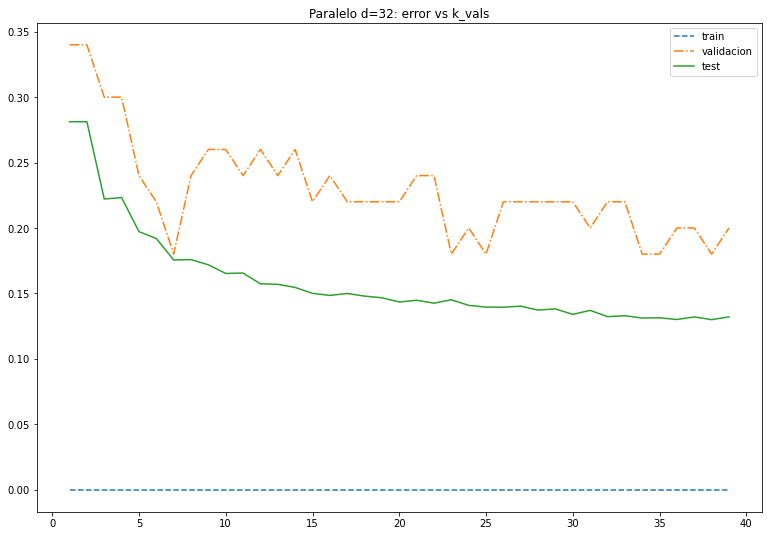

In [23]:
k_vals = range(1,40)
ej3_df_test = create_points_diagonal(32, 10000, .78)
ej3_df_data = create_points_diagonal(32, 250, .78)

ej3_clfs = get_best_KNC(k_vals=k_vals, w='distance', df_data=ej3_df_data, df_test=ej3_df_test)
plot_clfs_errors(k_vals, ej3_clfs, 'Diagonal d=32: error vs k_vals')

ej3_df_test = create_points_paralelo(32, 10000, .78)
ej3_df_data = create_points_paralelo(32, 250, .78)

ej3_clfs = get_best_KNC(k_vals=k_vals, w='distance', df_data=ej3_df_data, df_test=ej3_df_test)
plot_clfs_errors(k_vals, ej3_clfs, 'Paralelo d=32: error vs k_vals')


Se puede mencionar que el error de train es 0. La explicacion de esto lo podemos ver en el libro de clases (pag 234). Basicamente como estamos trabajando con peso segun distancia, si la distancia es 0 al punto mas cercano, entonces le damos la clase del punto mas cercano (terminan siendo los mismos puntos).

Tambien podemos ver que trabajando con dimensiones altas, el modelo mejor al aumentar la cantidad de vecinos para tomar en votacion. En mi opinion esto se debe a lo que explique anteriormente.

Por ultimo podemos ver que la curvas de paralelo y diagonal son similares, teniendo casi los mismos valores. Esto nos lleva a decir que el modelo es bueno para resolver ambos problemas.

# Ejercicio 4

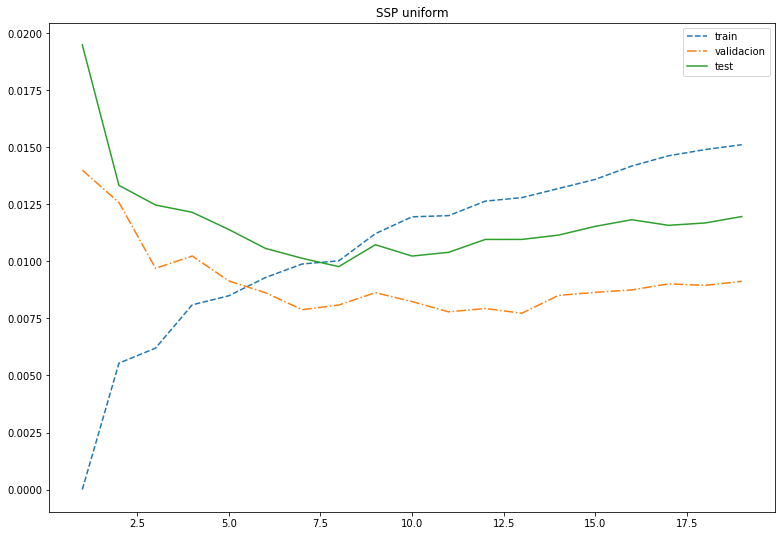

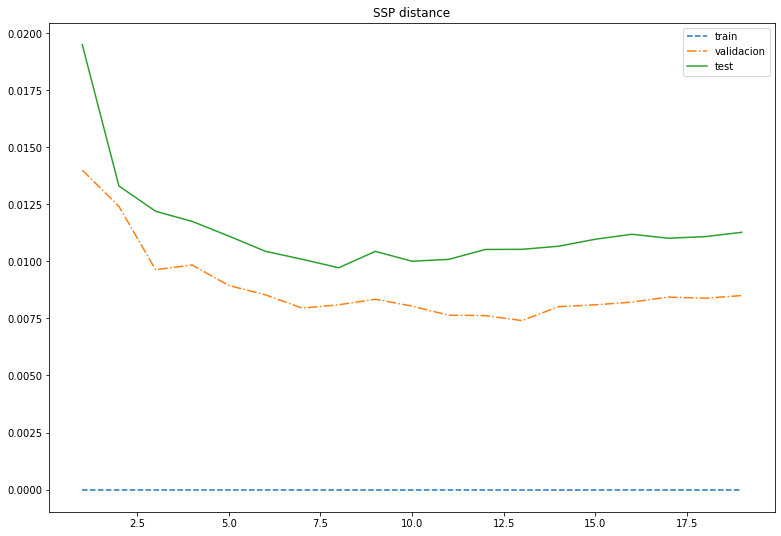

In [26]:
# SSP
_names = list(range(12))+['CLASS']
ej4_ssp_df_data = read_csv('ssp/ssp.data', names=_names)
ej4_ssp_df_test = read_csv('ssp/ssp.test', names=_names)

k_vals = range(1,20)
ej4_u_clfs = get_best_KNR(k_vals=k_vals, w='uniform', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(k_vals, ej4_u_clfs, 'SSP uniform')

ej4_d_clfs = get_best_KNR(k_vals=k_vals, w='distance', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(k_vals, ej4_d_clfs, 'SSP distance')

Se puede ver que las curvas son casi iguales para ambas graficas, entonces esto nos lleva a concluir a que no obtenemos mejor al darle distintos pesos a los votos. Tambien se puede ver que el mejor k es 8.

Luego en comparacion a las redes, se nota una mejora donde con redes llegamos a un error de 0.1 y con k-vecionos llegamos a un error de 0.011 aprox.

No se me ocurre una razon por la cual se produce el fenomeno que el error es muy similar en ambos problemas (peso por distancia y uniforme)


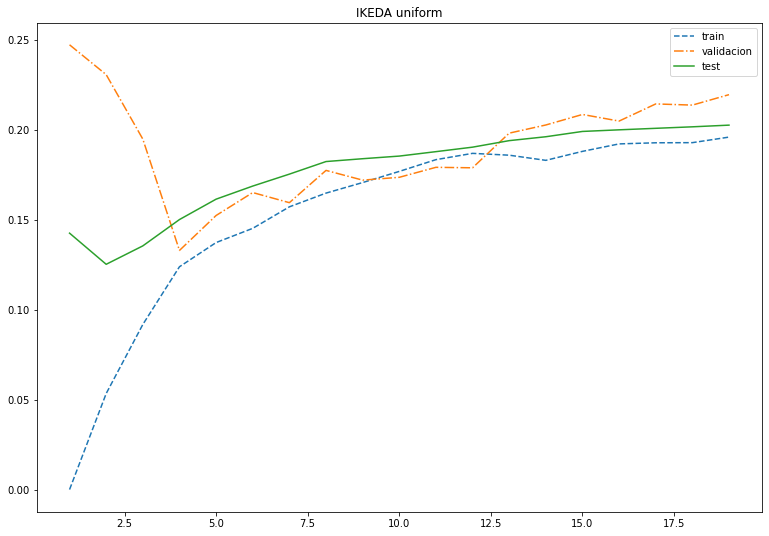

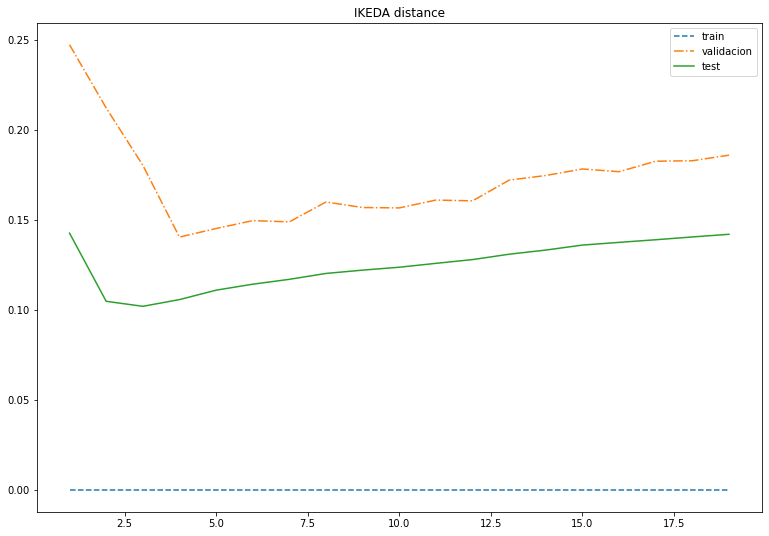

In [26]:
# IKEDA
ej4_ssp_df_data = read_csv('ikeda/ikeda.data', names=[0,1,2,3,4,'CLASS'], delim_whitespace=True)
ej4_ssp_df_test = read_csv('ikeda/ikeda.test', names=[0,1,2,3,4,'CLASS'], delim_whitespace=True)

k_vals = range(1,20)
ej4_clfs = get_best_KNR(k_vals=k_vals, w='uniform', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(k_vals, ej4_clfs, 'IKEDA uniform')

ej4_clfs = get_best_KNR(k_vals=k_vals, w='distance', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(k_vals, ej4_clfs, 'IKEDA distance')

A diferencia que SSP, con este problema si notamos una mejor al momento de utilizar el inverso a la distancia como peso. Tambien en ambos caso se ve que es mejor trabajar con un k pequeño (entre 2 y 4).

Tambien se puede ver que a diferencia de SSP, tenemos un mejor resultado utilizando redes que usando k-vecinos.

# Ejercicio 6

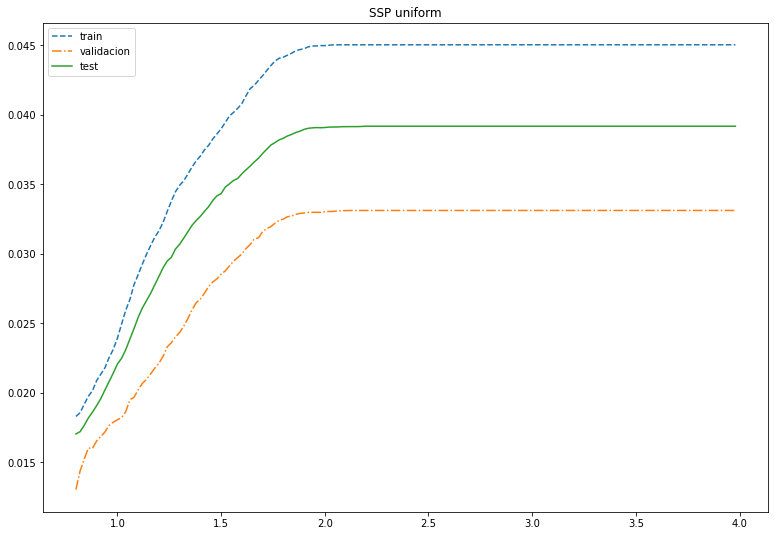

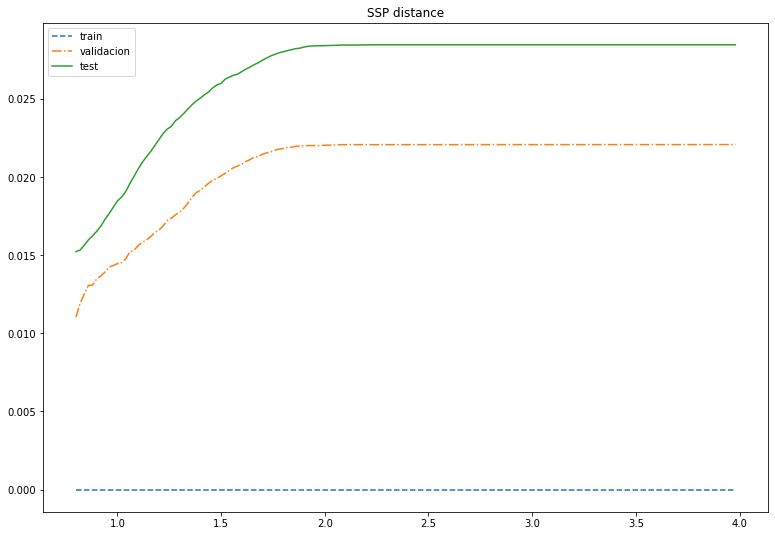

In [11]:
import numpy as np

# SSP
_names = list(range(12))+['CLASS']
ej4_ssp_df_data = read_csv('ssp/ssp.data', names=_names)
ej4_ssp_df_test = read_csv('ssp/ssp.test', names=_names)

r_vals = np.arange(.8, 4, .02)
ej4_clfs = get_best_RNC(r_vals=r_vals, w='uniform', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(r_vals, ej4_clfs, 'SSP uniform')

ej4_clfs = get_best_RNC(r_vals=r_vals, w='distance', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(r_vals, ej4_clfs, 'SSP distance')

En este problema podemos ver que ambas curvas de test se comportan igual, aumentan hasta llegar a 2 y apratir de ahi se plancha. Con esto podemos decir que al aumentar el radio mayor a 2 no vamos a tener mejora.

Tambien podemos ver que tomando el peso=distancia tenemos mejores resultado y si trabajamos con un radio chico, mejor.

Por ultimo podemos ver que con peso=uniforme, no se produce sobreajuste pero el modelo no llega a ser del todo bueno. Es preferible usar peso=distancia.

No encontre la razon que explique el comportamiento de la curva (que con un radio mayor a 2, el error es siempre lo mismo).

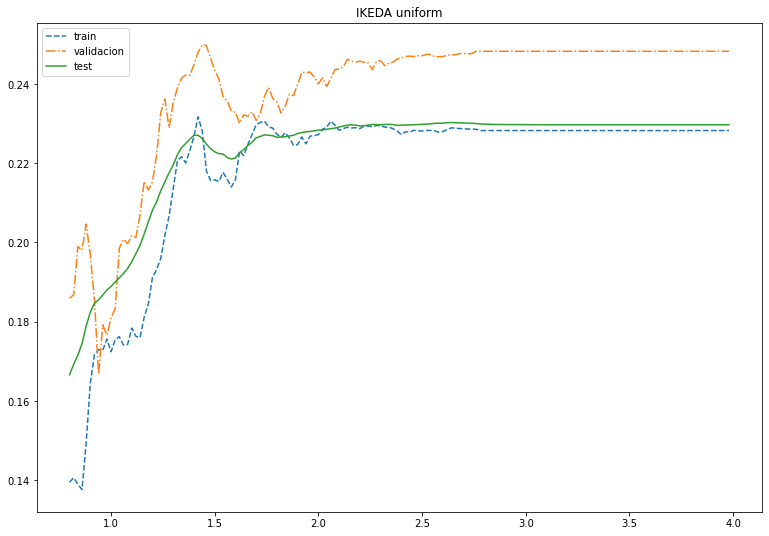

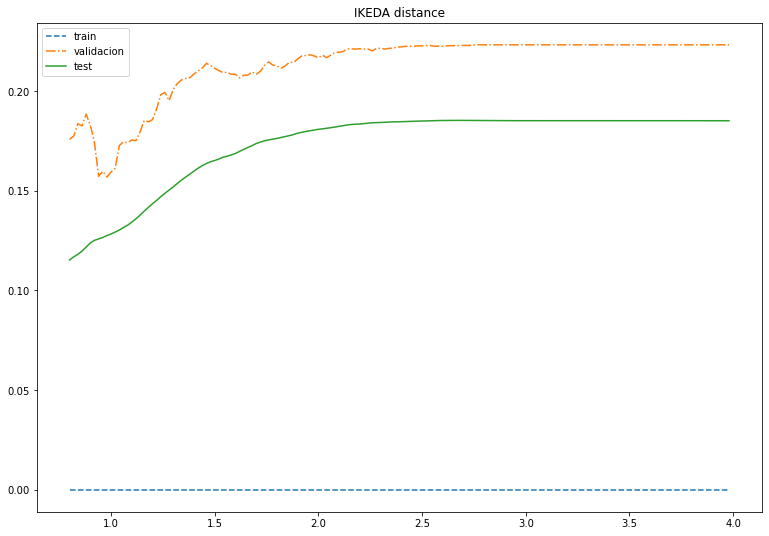

In [10]:
# IKEDA
ej4_ssp_df_data = read_csv('ikeda/ikeda.data', names=[0,1,2,3,4,'CLASS'], delim_whitespace=True)
ej4_ssp_df_test = read_csv('ikeda/ikeda.test', names=[0,1,2,3,4,'CLASS'], delim_whitespace=True)

r_vals = np.arange(.80, 4, .02)
ej4_clfs = get_best_RNC(r_vals=r_vals, w='uniform', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(r_vals, ej4_clfs, 'IKEDA uniform')

ej4_clfs = get_best_RNC(r_vals=r_vals, w='distance', df_data=ej4_ssp_df_data, df_test=ej4_ssp_df_test)
plot_clfs_errors(r_vals, ej4_clfs, 'IKEDA distance')

Se puede ver lo que dije en el ejercicio anterior, los errores son iguales cuando tomamos un radio mayor o igual a 2.

Tambien se puede ver que utilizar peso=distancia lleva a un mejor modelo y un menor error de test.

Y por ultimo se puede ver que no se produce sobreajuste usando peso=uniforme pero es mejor usar la inversa a la distancia.